# WEEK 04
# Encounter 06 - Confidence Intervals
# Project Challenge

## Task Description

For the bikes data set, calculate the 95% confidence intervals for the mean of the windspeed feature using bootstrapping. Create a notebook in which following questions shall be solved:

   1. Initialize empty list called `sample_means()`
   2. Create a `for loop` that will loop 10,000 times
   3. In each iteration using the pandas method `.sample()` sample 100 windspeeds with replacement
   4. Also in that same iteration take the mean of these 100 samples and then append it to the `sample_means` list
   5. Using `sns.displot` plot the distribution of the `sample_means` list
   6. Convert `sample_means` list to pandas `Series`
   7. Using pandas `.quantile()` calculation the upper (0.975) and lower (0.025) limits of the confidence interval of the `sample_means` list

**Bonus**

   8. Calculate using the `z-value` formula
   9. Compare to the results of the bootstrapping method

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

#import matplotlib.pyplot as plt

In [2]:
# read 'bikes' data
bikes = pd.read_csv('../data/bikes_with_bins.csv', index_col='datetime', parse_dates=True)
bikes.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2011-07-12 22:00:00,3,0,1,1,32.80,36.365,46,8.9981,44.0,150.0,194,22,July,Tuesday,2011,night
2011-12-26 08:00:00,1,1,0,1,13.12,16.665,45,8.9981,NaN,NaN,80,8,December,Monday,2011,morning
2011-05-20 18:00:00,2,0,1,1,24.60,31.060,56,11.0014,NaN,NaN,621,18,May,Friday,2011,evening
2012-07-29 17:00:00,3,0,0,1,33.62,37.120,41,11.0014,NaN,NaN,449,17,July,Sunday,2012,afternoon
2012-02-18 10:00:00,1,0,0,1,10.66,13.635,81,7.0015,48.0,157.0,205,10,February,Saturday,2012,morning


In [3]:
# Initialize empty list
sample_means = []

In [4]:
#filter 'bikes' data to work only with 'windspeed' values
windspeed = bikes['windspeed']
windspeed

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
                        ...   
2012-12-31 19:00:00    11.0014
2012-12-31 20:00:00    11.0014
2012-12-31 21:00:00    11.0014
2012-12-31 22:00:00     8.9981
2012-12-31 23:00:00     8.9981
Name: windspeed, Length: 17379, dtype: float64

In [5]:
# DEBUG info

#windspeed_sample = windspeed.sample(n=100, replace=True)

#windspeed_sample
#windspeed_sample.mean()

#sample_means.append(windspeed_sample.mean())
#sample_means

In [6]:
# a for loop that will loop 10,000 times
for i in range(10_000):
    # sample 100 windspeeds with replacement
    windspeed_sample = windspeed.sample(n=100, replace=True)
    # append the mean of these 100 samples to the sample_means list
    sample_means.append(windspeed_sample.mean())
    

In [7]:
# display first 10 values of 'sample_means' list
sample_means[0:10]

[11.690227,
 11.820408000000002,
 13.180374000000004,
 11.880172000000005,
 11.460283000000004,
 12.569936999999996,
 12.730335,
 13.460501,
 11.700478000000002,
 12.860449000000001]

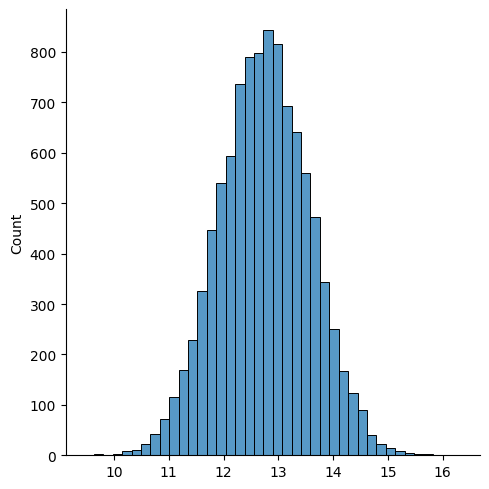

In [8]:
# plot the distribution of the sample_means list
sns.displot(data=sample_means, bins=40);

In [9]:
# Convert sample_means list to pandas Series
sample_means_series = pd.Series(sample_means)
sample_means_series.head()

0    11.690227
1    11.820408
2    13.180374
3    11.880172
4    11.460283
dtype: float64

In [19]:
# Using pandas .quantile() calculation the upper (0.975) and lower (0.025) limits of the 95% confidence interval
# of the sample_means list

alpha = 0.95
lower_quantile = (1-alpha)/2            # equals 0.025
upper_qunatile = alpha + ((1-alpha)/2)  # equals 0.975

lower_limit = sample_means_series.quantile(lower_quantile)
upper_limit = sample_means_series.quantile(upper_qunatile)

print(f'The Confidence Interval of the average wind speed is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average wind speed is between 11.150274 and 14.340849174999997


## BONUS

### 8. Calculate using the z-value formula

In [15]:
# mean value of windspeed:
windspeed_mean = windspeed.mean()

# standard deviation (std) of windspeed:
windspeed_std = windspeed.std()

print(windspeed_mean, windspeed_std)

12.736539622532941 8.196795314376963


In [21]:
# alpha = 0.95, then z = 1.96

z = 1.96
n = 100 # the SAME sample number as in Bootstrapping method !!!

lower_limit_eq = windspeed_mean - ((z * windspeed_std)/np.sqrt(n))
upper_limit_eq = windspeed_mean + ((z * windspeed_std)/np.sqrt(n))

print(f'The Confidence Interval of wind speed is between {lower_limit_eq} and {upper_limit_eq}')


The Confidence Interval of wind speed is between 11.129967740915056 and 14.343111504150826


### 9. Compare to the results of the bootstrapping method

**Bootstrapping method:**
  The 95% Confidence Interval of the average wind speed is between **11.1503** and **14.3408**

**z-value formula results:**
  The 95% Confidence Interval of wind speed is between **11.1300** and **14.3431**

**Conclusion:** Result are very close! But using z-value formula is less time-consuming in terms of calculation.